# Written by Claude 2.5

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

2023-09-04 20:23:51.251210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:23:51.303563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:23:51.304044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:23:51.304854: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2023-09-04 20:23:54.217009: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-09-04 20:23:56.192788: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 11s 5ms/step - loss: 1.5405 - accuracy: 0.4354 - val_loss: 1.2550 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1664 - accuracy: 0.5871 - val_loss: 1.0797 - val_accuracy: 0.6233
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0202 - accuracy: 0.6438 - val_loss: 1.0181 - val_accuracy: 0.6443
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9299 - accuracy: 0.6758 - val_loss: 0.9369 - val_accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8566 - accuracy: 0.7000 - val_loss: 0.9073 - val_accuracy: 0.6925
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7944 - accuracy: 0.7219 - val_loss: 0.8725 - val_accuracy: 0.7014
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7479 - accuracy: 0.7366 - val_loss: 0.8998 - val_accuracy: 0.6980
Ep

In [8]:
# Evaluate model on test set  
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8795 - accuracy: 0.7054
Test accuracy: 0.7053999900817871


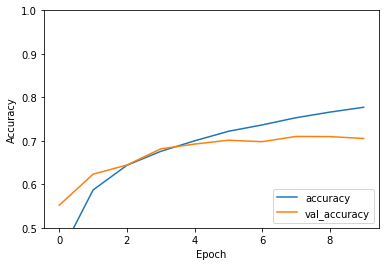

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

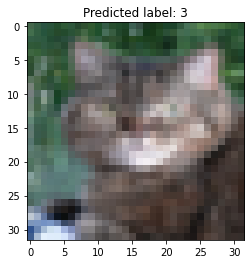

Done!


In [10]:
# Make predictions on test set
test_preds = model.predict(x_test)
test_preds = np.argmax(test_preds, axis=1)

# Display sample prediction
i = np.random.choice(len(test_preds))
plt.imshow(x_test[i]) 
plt.title('Predicted label: ' + str(test_preds[i]))
plt.show()

print('Done!')